# Qlearning on the Grid World

In this notebook we deploy the qlearning technique on a simple grid world problem.

The grid world is composed by a set of states organized in a grid. 
The agent has only view of its current state, and can move to an adjacent state via four possible moves: left, up, right and down.

One or more states are marked as winning states, and the goal is to teach the agent to reach them. 

After, a while, by trail and error, the agent learns the correct sequence of actions to complete the task.

Learning is world-specific (and it could not be otherwise). 
if you change the world, you need to repeat training.

The world grid is an abstraction: an encoding of a possible Markov Decision Process. 



In [36]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

We start defining the dimensions of the grid, and the transitions corresponding to moves. Trying to pass the border of the grid results in a no-action.

In [37]:
Wdim = 4
Hdim = 3

def move(s,a):
    i,j = s
    if a==0: #left
        i = max(i-1,0)
    elif a==1: #up
        j = min(j+1,Hdim-1)
    elif a==2: #right
        i = min(i+1,Wdim-1)
    elif a==3: #down
        j = max(j-1,0)
    return (i,j)

Now we define the terminal states, and a function generating a random state, that will be used as the initial state for training episodes.

In [38]:
def term(s):
    return (s==(0,2) or s==(3,1))

def random_state():
    return (np.random.randint(Wdim),np.random.randint(Hdim))

Now we define a couple of functions that will allow us to visualize the resulting Qfuntion and Vfunction in the form of heatmaps.

Drawing Values is done in the obvious way. We normalize values in the range [0,1] and use the colormap facilities of pyplot.

In [39]:
def drawV(Vtable):
    Vmax = np.max(Vtable)+.2
    Vmin = np.min(Vtable)-.2
    VtableNorm = (Vtable - Vmin)/(Vmax-Vmin)
    xdim,ydim = Vtable.shape
    print(xdim,ydim)
    plt.figure()
    plt.axis('off')

    for i in range(xdim):
      for j in range(ydim):
          x = [i,i+1,i+1,i]
          y = [j,j,j+1,j+1]
          plt.text(i+.36,j+.46,"{:.2f}".format(Vtable[i,j]))
          plt.fill(x,y,edgecolor='black',facecolor=cm.Reds(VtableNorm[i,j]))

    plt.show()

The case of Qvalues is a bit nore problematic, since the Qtable has four dimensions. We split each cell in four along its diagonals, and put each qvalue q(s,a) in the cell corresponding to the action a, namely 0=left, 1=up, 2=right and 3=down.

In [40]:
def drawQ(Qtable,save_as=None):
    Qmax = np.max(Qtable)+.2
    Qmin = np.min(Qtable)-.2
    QtableNorm = (Qtable - Qmin)/(Qmax-Qmin)
    xdim,ydim,zdim = Qtable.shape
    print("Qshape=",xdim,ydim,zdim)
    plt.figure()
    plt.axis('off')

    for i in range(xdim):
      for j in range(ydim):
          x = [i,i,i+.5]
          y = [j,j+1,j+.5]
          plt.text(i+.1,j+.46,"{:.2f}".format(Qtable[i,j,0]))
          plt.fill(x,y,edgecolor='black',facecolor=cm.Reds(QtableNorm[i,j,0]))
          x = [i,i+1,i+.5]
          y = [j+1,j+1,j+.5]
          plt.text(i+.35,j+.79,"{:.2f}".format(Qtable[i,j,1]))
          plt.fill(x,y,edgecolor='black',facecolor=cm.Reds(QtableNorm[i,j,1]))
          x = [i+1,i+1,i+.5]
          y = [j+1,j,j+.5]
          plt.text(i+.63,j+.46,"{:.2f}".format(Qtable[i,j,2]))
          plt.fill(x,y,edgecolor='black',facecolor=cm.Reds(QtableNorm[i,j,2]))
          x = [i,i+1,i+.5]
          y = [j,j,j+.5]
          plt.text(i+.35,j+.19,"{:.2f}".format(Qtable[i,j,3]))
          plt.fill(x,y,edgecolor='black',facecolor=cm.Reds(QtableNorm[i,j,3]))
    if save_as:
        plt.savefig(save_as,bbox_inches='tight')
    plt.show()


Let us come to the learning algorithm.

As action reward, we just give a unitary negative reward for each step. In this way, the agent will learn to reach  a terminal state in a minimum number of steps.

We can now initialize the  Qtable, the Vtable, and the main hyperparameters for the qlearning technique.

In [41]:
Qtable = np.zeros((Wdim,Hdim,4)) #4 actions
Vtable = np.zeros((Wdim,Hdim))

alpha = .01 #learning rate
gamma = .95 #time discount
epsilon = 1
episodes = 10000
exploitation_start = 5000
final_randomicity = .1
epsilon_rate = final_randomicity**(1./episodes)

In [42]:
verbose = True

for n in range(0,episodes):
    if verbose and (n % 1000 == 0):
      print("episode no {}".format(n))
    s0 = random_state()
    while not term(s0):
        #choose action
        if np.random.random() > epsilon:
            a = np.argmax(Qtable[s0])
        else:
            a = np.random.randint(4)
        s1 = move(s0,a)
        T = term(s1)
        if T:
            R = -1
        else:
            R = -1 + gamma*np.max(Qtable[s1])
        Qtable[s0][a] = Qtable[s0][a] + alpha*(R-Qtable[s0][a])
        s0 = s1
    if n > 5000: #no exploitation for the first 5000 iterations
        epsilon = epsilon * epsilon_rate 

episode no 0
episode no 1000
episode no 2000
episode no 3000
episode no 4000
episode no 5000
episode no 6000
episode no 7000
episode no 8000
episode no 9000


We can now draw the resulting optimal Qtable.

Qshape= 4 3 4


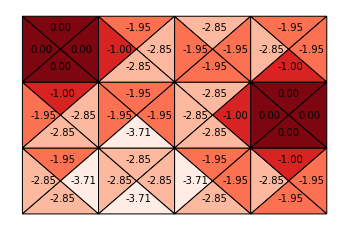

In [43]:
drawQ(Qtable)

4 3


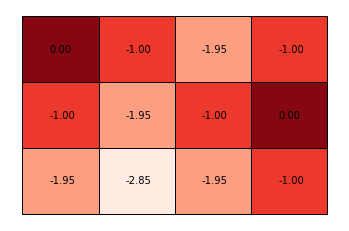

In [44]:
Vtable = np.max(Qtable,axis=-1)
drawV(Vtable)